Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 2 </h2>
    <h1> Algoritmo de Louvain </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Primer Semestre 2023<br>    
        Fecha de entrega: Miércoles 12 de abril
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas. 

**IMPORTANTE**: 
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

# 1. Instalaciones (0 pts.)
Correr sólo una vez y si no tienes estos paquetes instalados de antes. Puede pasar que no te funcione correrlo en el jupyter notebook, en ese caso puedes correr la misma línea en la terminal

## 1.1 Networkx
Librería que nos permite crear, modificar y analizar grafos.

In [3]:
#pip install networkx[default]


## 1.2 community
Librería que tiene implementado el algoritmo de louvain. Se importa como sigue, aunque se importa como community

In [4]:
#pip install python-louvain

# 2. Imports (0 pts.)
Para hacer la tarea basta con los imports que están acá abajo. Si desean importar una librería más, deben consultar al equipo docente para que se apruebe su uso mediante el foro. En caso de que use alguna librería sin aviso se arriesga a que no se le revise la tarea o a un descuento

In [5]:
# Aquí haz los imports. 
import networkx as nx
import graphic_generator # El archivo que crea el grafo de los miserables, está incluído en los archivos subidos
import matplotlib.pyplot as plt
from community import community_louvain
import numpy as np
import random

# 3. Construcción de grafos iniciales (0 pts.)
Se importará un grafo con la función les_miserables_graph(directed). El argumento que recibe esta función indica si sus nodos serán dirigidos o no. Debes crear ambos grafos, uno dirigido y otro no dirigido.

In [6]:
Gd = graphic_generator.les_miserables_graph(directed=True)
Gu = graphic_generator.les_miserables_graph(directed=False)

# 4. Análisis de los grafos (15 pts.)
Se debe buscar en la documentación oficial de Networkx para aprender a usar sus herramientas de análisis

## 4.1 Dibujar el grafo para hacer una visualización inicial (4 pts.)
Debes dibujar tanto el grafo dirigido como no dirigido

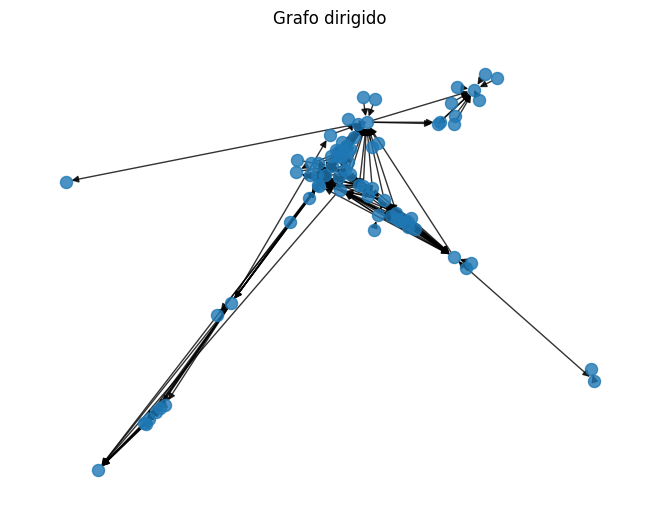

In [7]:
# grafo dirigido
pos = nx.spring_layout(Gd)
nx.draw(Gd, pos, node_size = 75, alpha = 0.8)
plt.title('Grafo dirigido')
plt.show()

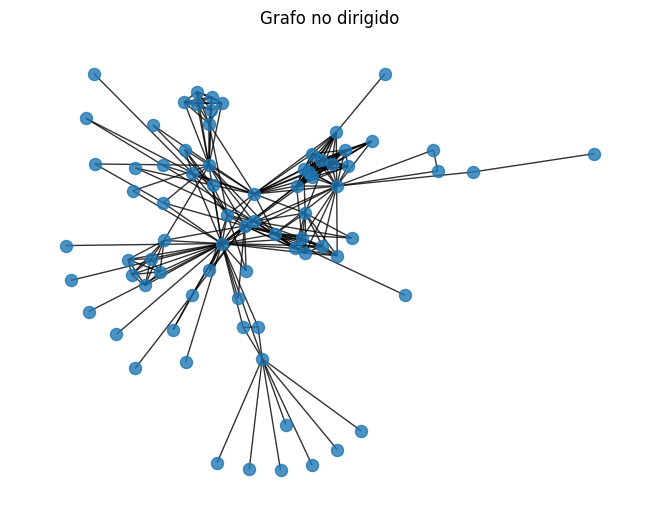

In [8]:
# Grafo no dirigido
pos = nx.spring_layout(Gu)
nx.draw(Gu, pos, node_size = 75, alpha = 0.8)
plt.title('Grafo no dirigido')
plt.show()

## 4.2 Análisis cuantitativo (3 pts.)
Para cada grafo creado debes imprimir su tipo de objeto, número de nodos y número de ejes. Todo esto en un print ordenado, ej: "Número de nodos: 27"

In [9]:
# Grafo dirigido
print(f'Tipo de Objeto: {type(Gd)}')
print(f'Número de nodos: {Gd.__len__()}')
print(f'Número de ejes: {Gd.size()}')

Tipo de Objeto: <class 'networkx.classes.digraph.DiGraph'>
Número de nodos: 77
Número de ejes: 254


In [10]:
# Grafo no dirigido
print(f'Tipo de Objeto: {type(Gu)}')
print(f'Número de nodos: {Gu.__len__()}')
print(f'Número de ejes: {Gu.size()}')

Tipo de Objeto: <class 'networkx.classes.graph.Graph'>
Número de nodos: 77
Número de ejes: 254


## 4.3 Aplicar el Algoritmo de Louvain (8 pts.)
Aplicaremos el algoritmo desde la libería community. Esto debes hacerlo sólo para el grafo no-dirigido, ya que esta librería sólo importa una función para aplicar el algoritmo a grafos no-dirigidos. Posteriormente debes hacer un plot del grafo con colores que representen cada uno de las comunidades

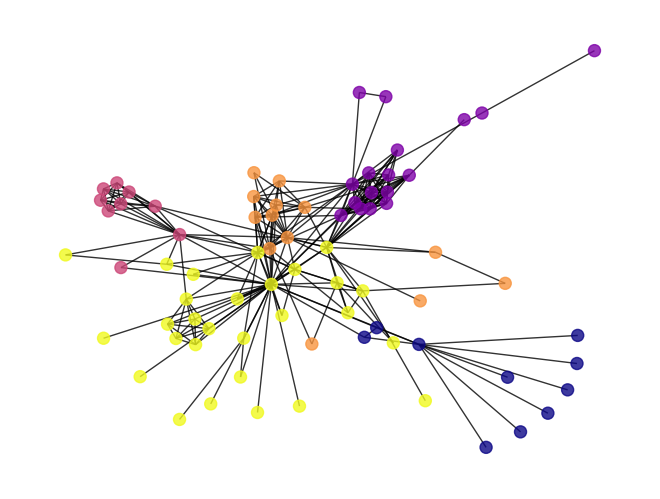

In [11]:
# Crear objeto community
comms = community_louvain.best_partition(Gu)

# crear objetos a graficar
from matplotlib import cm, colors # podemos importar??

unique_coms = np.unique(list(comms.values()))
norm = colors.Normalize(vmin=min(unique_coms), vmax=max(unique_coms), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.plasma)

node_cmap = [tuple((mapper.to_rgba(v)[0], mapper.to_rgba(v)[1], mapper.to_rgba(v)[2])) for _,v in comms.items()]

pos = nx.spring_layout(Gu)
nx.draw(Gu, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.show()

# 5. Crear nuestro propio algoritmo. (25 pts.)
Ya que la librería que tenemos sólo sirve para grafos no-dirigidos, debes programar tu propia función de python para el Algoritmo de Louvain, sólo que esta vez será un algoritmo para grafos dirigidos. Para esto, nos apoyaremos en el siguiente paper que modifica el cálculo de la modularidad en el algoritmo para que funcione para grafos dirigidos (El pdf se puede descargar gratis):
- Nicolas Dugué, Anthony Perez. Directed Louvain : maximizing modularity in directed networks. [Research Report] Université d’Orléans. 2015. ffhal-01231784ff

Además, nos guiaremos por el siguiente pseudo-código (modificando la modularidad). Pueden borrar la imagen del notebook si les incomoda y verla desde otra pestaña

IMPORTANTE: Para simplificar la tarea programaremos sólo una iteración del algoritmo de Louvain. Esto significa que cuando no encontremos una mejora en la modularidad del algoritmo cambiando algún nodo, no crearemos el nuevo grafo haciendo merge a cada una de las comunidades en un nuevo grafo, si no que terminaremos el algoritmo

Fuente: Rita, L. Link: https://towardsdatascience.com/louvain-algorithm-93fde589f58c.

PD: revisar documentación de métodos out_degree, in_degree, predecessors y successors; pueden ser útiles

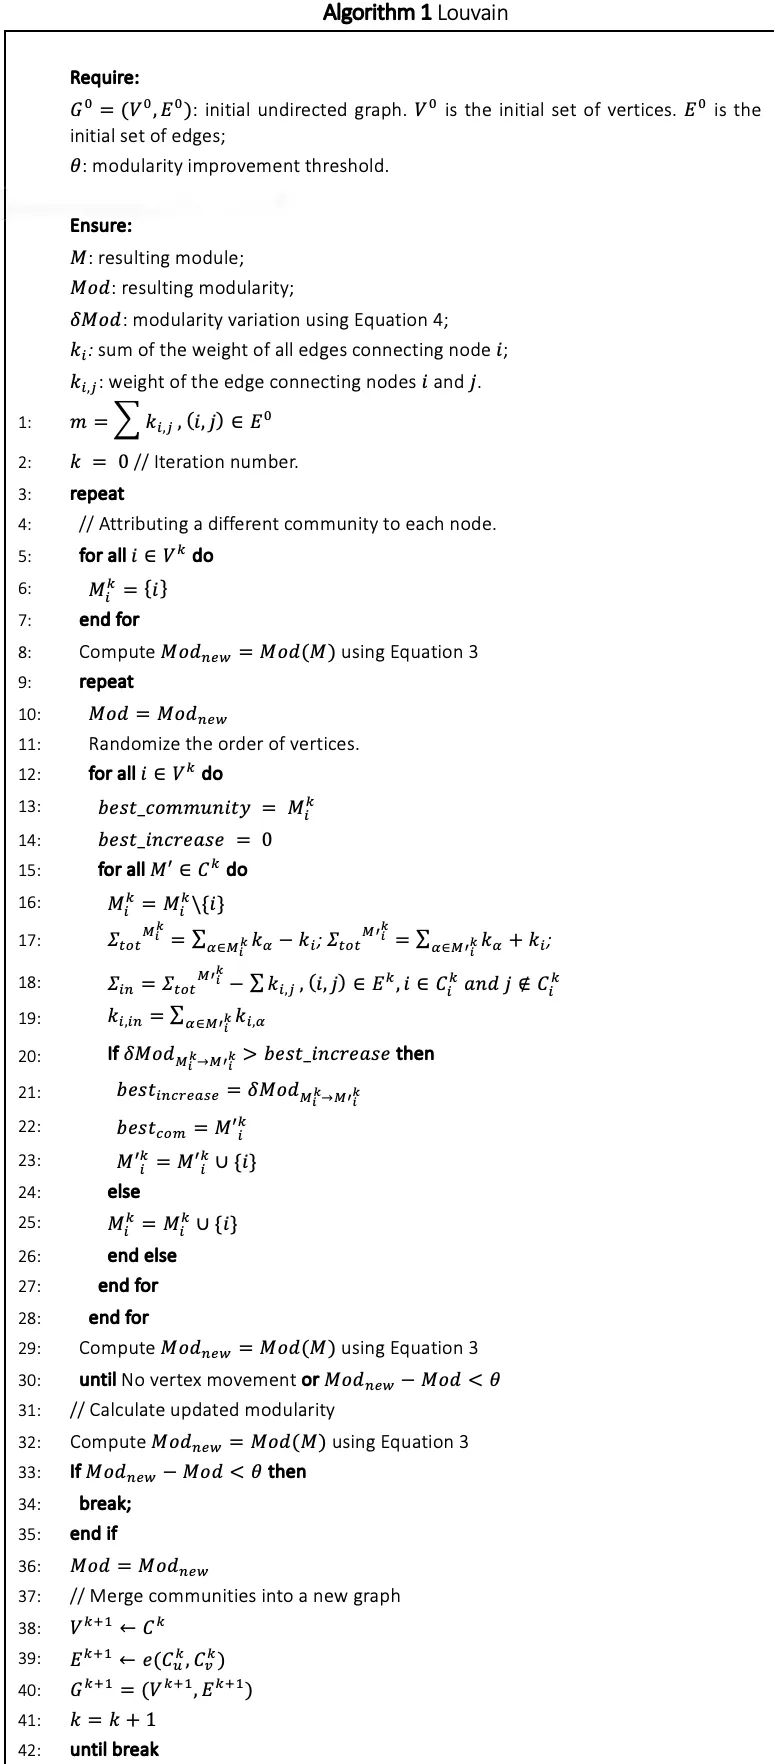

In [12]:
# Para esto vamos a crear una lista con los nodos.

nodos = list(Gd.nodes())


In [81]:
class Comunidad:
    # Puede ser útil crear métodos que manejen localmente cada comunidad
    def __init__(self):
        self.nodes = []
        self.m = Gd.__len__()
        self.out_edges = []
        self.in_edges = []
        self.internal_edges = []
        
    def submodularidad(self):
        q = 0
        if len(self.nodes) > 1:
            for u in self.nodes:
                for v in self.nodes:
                    q += 1/self.m * (int(Gd.has_edge(u,v)) - Gd.in_degree(u)*Gd.out_degree(v)/self.m)
        return q    

    def __repr__(self):
        return str(self.nodes)
    
    def agregar_nodos(self, nodos: list):
        old = self.nodes.copy()
        new = []
        for nod in nodos:
            if nod in old:
                pass
            else:
                new.append(nod)
        self.nodes = self.nodes + nodos
        if new == []:
            pass
        else:
            if old == []:
                self.asignar_arcos()
            else:
                self.actualizar_arcos(nodos)

    def asignar_arcos(self):
        for arc in Gd.edges():
            if arc[0] in self.nodes and arc[1] in self.nodes:
                self.internal_edges.append(arc)
            elif arc[0] in self.nodes and arc[1] not in self.nodes:
                self.out_edges.append(arc)
            elif arc[0] not in self.nodes and arc[1] in self.nodes:
                self.in_edges.append(arc)
            else:
                pass
    
    def actualizar_arcos(self,nuevos_nodos):
        for arc in Gd.edges():
            if arc[0] in nuevos_nodos and arc[1] in nuevos_nodos:
                self.internal_edges.append(arc)
            elif arc[0] in nuevos_nodos and arc[1] not in nuevos_nodos:
                self.out_edges.append(arc)
            elif arc[0] not in nuevos_nodos and arc[1] in nuevos_nodos:
                self.in_edges.append(arc)
            else:
                pass
    
    def com_degree(self, i):
        out = 0
        for edge in self.in_edges:
            if edge[0] == i:
                out += 1
        for edge in self.out_edges:
            if edge[1] == i:
                out += 1
        for edge in self.internal_edges:
            if edge[0] == i or edge[1] == i:
                out += 1
        return out
    
    def sacar_nodo(self, node):
        for edge in self.in_edges:
            if edge[1] == node:
                self.in_edges.remove(edge)
        for edge in self.out_edges:
            if edge[0] == node:
                self.out_edges.remove(edge)
        for edge in self.internal_edges:
            if edge[0] == node or edge[1] == node:
                self.internal_edges.remove(edge)
        self.nodes.remove(node)

In [136]:
class Comunidades:
    # No están necesariamente todos los métodos que necesitan, pero sí algunos que quizás les pueden ser útiles
    def __init__(self, grafo, lista_nodos, semilla=17):
        random.seed(semilla) # No borrar, ya que el algoritmo tiene cierta componente de aleatoriedad. Usaremos la semilla 17

        # Aplicaremos randomizar los nodos exactamente una vez en cada paso del algoritmo
        lista_nodos = sorted(nodos, key=lambda x: random.randint(0, len(lista_nodos)))
        self.G = grafo
        self.comunidades = []
        self.lista_nodos = lista_nodos  # Guardamos la lista de nodos
        # Podemos guardar las comunidades como una lista de elementos del tipo comunidad. Hacemos la asignación inicial acá mismo
        for node in self.lista_nodos:
            C = Comunidad()
            C.agregar_nodos([node])
            self.comunidades.append(C)
            #print(C.in_edges, Gd.in_degree(node), Gd.degree(node), C.nodes, Gd.out_degree(node), C.out_edges)
        print(f'Num comunidades: {len(self.comunidades)}')
        # El argumento m no cambia a lo largo del algoritmo, podemos calcularlo sólo una vez. al principio
        self.m = grafo.__len__()
        # Calculamos la modularidad inciial
        self.M = 0
        for com in self.comunidades:
            self.M += com.submodularidad() 
        print(f'Modularidad: {self.M}')
        self.increase = 0
    
    def delta_modularidad(self, i, comunidad):
        '''Nos puede facilitar la vida un método que nos dé el delta de modularidad entre un nodo i y una comunidad'''
        dic = comunidad.com_degree(i)
        out = dic/self.m - (Gd.out_degree(i)*len(comunidad.in_edges) + Gd.in_degree(i)*len(comunidad.out_edges))/(self.m)**2
        #print(out)
        return out

    def print_comunidades(self):
        # No obligatoria, sirve para monitoriar el avance del algoritmo mientras uno hace el código
        for com in self.comunidades:
            print(com)
        
    def run(self):
        # Esto es simplemente una plantilla. 
        # Pueden seguirla o no, lo importante es que ocupen sorted para ordenar en cada paso la lista de nodos que revisarán
        loop = True
        while(loop):

            verts = sorted(self.lista_nodos,key=lambda x: random.randint(0, len(self.lista_nodos)))
            max_deltas = []
            cambios = []
            for node in verts:
                g, cambio = self.reasignar_nodo(node)
                max_deltas.append(g)
                cambios.append(int(cambio))
            
            print(cambios)
            
            if sum(cambios) == 0:
                loop = False

            self.comunidades = [com for com in self.comunidades if com.nodes != []]
            print(f'Numero de comunidades: {len(self.comunidades)}')

            

    def reasignar_nodo(self, node):
        deltas = []
        cambio = False
        for com in self.comunidades:
            deltas.append(self.delta_modularidad(node, com))
            k = np.argmax(deltas)
            if deltas[k] > 0:
                cambio = True
                for com in self.comunidades:
                    if node in com.nodes:
                        j = self.comunidades.index(com)
                self.comunidades[j].sacar_nodo(node)
                self.comunidades[k].agregar_nodos([node])
        return deltas[k], cambio
    
    def asignar_comunidades(self):
        '''Este método toma las comunidades creadas en el algoritmo y las pone en un mejor formato para hacer un plot del grafo.
        Retorna un dict'''
        pass
        

# 6. Corremos el algoritmo (10 pts.)
Corremos el algoritmo creado anteriormente y ploteamos los resultados

## 6.1 Corremos el algoritmo con la seed por defecto. (3 pts.)

In [137]:
comunidades = Comunidades(grafo=Gd,lista_nodos=Gd.nodes)
comunidades.run()

Num comunidades: 77
Modularidad: 0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Numero de comunidades: 26
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Numero de comunidades: 20
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
Numero de comunidades: 18
[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1

KeyboardInterrupt: 

0

## 6.2 Hacemos el mismo proceso con otras seeds (7 pts.)
Comparamos las modularidades corriendo la función entre al menos 30 seeds, printeando cada modularidad de la forma "Modularidad seed {seed_i}: {modularidad_seed_i}". Posteriormente elegimos la mejor y ploteamos el grafo coloreado, dejando como título la seed con mejor modularidad

# 7. Preguntas teóricas (10 pts.) (2 c/u)

- 1. ¿Qué es la modularidad y cuáles son los rangos que toma?
- 2. ¿Por qué puedo preferir el algoritmo de Louvain sobre otros para encontrar comunidades? ¿Cuál es su complejidad?
- 3. Cómo explicarías con tus palabras la parte del algoritmo que faltó en nuestra función?
- 4. ¿Qué es un algoritmo codicioso y por qué el algoritmo de Louvain puede considerarse uno?
- 5. ¿Por qué se define el delta de modularidad si simplemente podemos calcular la modularidad nuevamente?